## Import Libraries

In [168]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageOps
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Convolutional Neural Networks

- Read labels of training data from csv file.

In [169]:
train_data = pd.read_csv("images_train/data.csv")

train_data.head()

,id,values
0,0,oō
1,1,oö
2,2,eê
3,3,oó
4,4,ii


- Print the shape of data.csv

In [170]:
print("data.csv")
print("Trainset data dimensions: {}".format(train_data.shape))

data.csv
Trainset data dimensions: (2000, 2)


- Load trainning images which are sorted by name.
- Then we transform the images to grayscale.

In [171]:
image_list = []
for filename in sorted(glob.glob('images_train/*.png')): #assuming gif
    im = Image.open(filename).convert('L')
    im = np.asarray(im)
    image_list.append(im)

In [172]:
print("Shape:", image_list[0].shape)
print("Value:", image_list[0])

Shape: (128, 128)
Value: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


- The next cell shows images and labels for several examples.

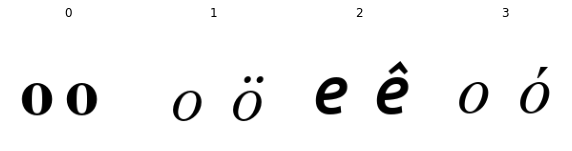

In [173]:
images = image_list[:4]

fig, ax = plt.subplots(1, 4, figsize=(10, 40))

for i in range(4):
    ax[i].imshow(images[i], cmap="gray")
    ax[i].set_title("{}".format(i))
    ax[i].axis("off")

- To normalize the values of the pixels we divide all values in the image by 255. We also add an extra dimension to the images since we will need it in the definition of the neural network.

In [174]:
train_images = np.asarray(image_list)
train_images = np.true_divide(train_images, 255)
train_images = np.expand_dims(train_images, axis=3)

print(train_images.shape)

(2000, 128, 128, 1)


- Give the letters with corresponding number in order to train model.

In [175]:
idx = 0
d = {}
for i in train_data['values']:
    if i not in d:
        d[i] = idx
        idx += 1

print(d)

{'oō': 0, 'oö': 1, 'eê': 2, 'oó': 3, 'ii': 4, 'eë': 5, 'uū': 6, 'eè': 7, 'oò': 8, 'iï': 9, 'oo': 10, 'oô': 11, 'uû': 12, 'aá': 13, 'eē': 14, 'iì': 15, 'uú': 16, 'ee': 17, 'uù': 18, 'aa': 19, 'uü': 20, 'aâ': 21, 'iı̄': 22, 'aà': 23, 'aā': 24, 'eé': 25, 'ií': 26, 'iî': 27, 'uu': 28, 'aä': 29}


In [176]:
train_data['category'] = np.nan
for index, row in train_data.iterrows():
    # print(row['values'])
    row['category'] = d[row['values']]
    train_data.iloc[index] = row

print(train_data)

        id values  category
0        0    oō       0.0
1        1     oö       1.0
2        2     eê       2.0
3        3     oó       3.0
4        4     ii       4.0
...    ...    ...       ...
1995  1995    eē      14.0
1996  1996     iì      15.0
1997  1997     aá      13.0
1998  1998     oö       1.0
1999  1999     oô      11.0

[2000 rows x 3 columns]


In [178]:
train_label = train_data['category']

print(train_label)

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
        ... 
1995    14.0
1996    15.0
1997    13.0
1998     1.0
1999    11.0
Name: category, Length: 2000, dtype: float64


- Apply "to_categorical" to get the corresponding one hot vectors.

In [179]:
# from tensorflow.keras.utils import to_categorical

# train_label_to_categorical = to_categorical(train_data['category'], dtype ="uint8")

# print(train_label_to_categorical)

- Now we train a convolutional neural network using Conv2D layers.

In [190]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same',
                                 input_shape=train_images.shape[1:]))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(30, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [191]:
history = model.fit(train_images, train_label, validation_split=0.1, batch_size=32, epochs=10)

Epoch 1/10
57/57 [==============================] - 187s 3s/step - loss: 6.1544 - accuracy: 0.0567 - val_loss: 3.2569 - val_accuracy: 0.1450
Epoch 2/10
57/57 [==============================] - 174s 3s/step - loss: 2.8604 - accuracy: 0.2033 - val_loss: 2.5302 - val_accuracy: 0.2500
Epoch 3/10
57/57 [==============================] - 220s 4s/step - loss: 2.3166 - accuracy: 0.3550 - val_loss: 2.3983 - val_accuracy: 0.3450
Epoch 4/10
57/57 [==============================] - 207s 4s/step - loss: 1.9404 - accuracy: 0.4283 - val_loss: 2.2688 - val_accuracy: 0.3000
Epoch 5/10
18/57 [========>.....................] - ETA: 2:07 - loss: 1.5889 - accuracy: 0.5312

KeyboardInterrupt: 

In [186]:
def accuracy_plot(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train_val", "Test_val"], loc="upper left")
    plt.show()

In [187]:
def loss_plot(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train_loss", "Test_loss"], loc="upper left")
    plt.show()

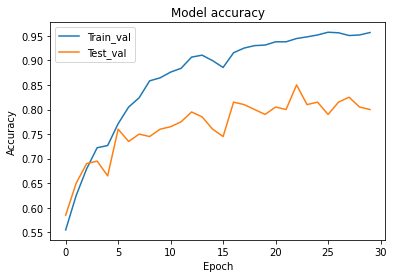

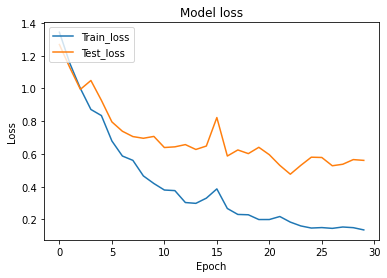

In [188]:
accuracy_plot(history)
loss_plot(history)

- Since we have used a part of the trainset to do the evaluation, we can now measure the performance of the model on the testset.

In [189]:
score = model.evaluate(mnist_test_images, mnist_test_labels)
print("Test loss: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

NameError: name 'mnist_test_images' is not defined